In [4]:
import pandas as pd
import re 

def parse_hex_data_with_features(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = []
    current_date = None
    packet_data = []

    for line in lines:
        line = line.strip()
        if re.match(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\.\d{6}', line):
            if current_date and packet_data:
                data.append((current_date, ''.join(packet_data).replace(" ", "")))
            current_date = line
            packet_data = []
        elif line:
            packet_data.append(line)

    if current_date and packet_data:
        data.append((current_date, ''.join(packet_data).replace(" ", "")))

    # Création du DataFrame à partir des données extraites
    df = pd.DataFrame(data, columns=['Timestamp', 'Hex Data'])

    # Extraction des champs spécifiques
    df['MAC_Destination'] = df['Hex Data'].apply(lambda x: x[:12])
    df['MAC_Source'] = df['Hex Data'].apply(lambda x: x[12:24])
    df['Protocol_Type'] = df['Hex Data'].apply(lambda x: x[24:])
    df['IP_Version_Header_Length'] = df['Hex Data'].apply(lambda x: x[28:2])
    df['Total_Length'] = df['Hex Data'].apply(lambda x: x[32:34])
    df['TTL'] = df['Hex Data'].apply(lambda x: x[34:36])
    df['Protocol'] = df['Hex Data'].apply(lambda x: x[36:38])
    df['Checksum'] = df['Hex Data'].apply(lambda x: x[38:42])
    df['IP_Source'] = df['Hex Data'].apply(lambda x: x[42:50])
    df['IP_Destination'] = df['Hex Data'].apply(lambda x: x[50:58])
    df['UDP_Source_Port'] = df['Hex Data'].apply(lambda x: x[58:62])
    df['UDP_Destination_Port'] = df['Hex Data'].apply(lambda x: x[62:66])
    df['UDP_Length'] = df['Hex Data'].apply(lambda x: x[66:70])
    df['UDP_Checksum'] = df['Hex Data'].apply(lambda x: x[70:74])

    # Conversion de certaines valeurs hexadécimales en décimal ou format humain
    df['MAC_Destination'] = df['MAC_Destination'].apply(lambda x: ':'.join([x[i:i+2] for i in range(0, 12, 2)]))
    df['MAC_Source'] = df['MAC_Source'].apply(lambda x: ':'.join([x[i:i+2] for i in range(0, 12, 2)]))
    df['IP_Source'] = df['IP_Source'].apply(lambda x: '.'.join([str(int(x[i:i+2], 16)) for i in range(0, 8, 2)]))
    df['IP_Destination'] = df['IP_Destination'].apply(lambda x: '.'.join([str(int(x[i:i+2], 16)) for i in range(0, 8, 2)]))
    df['UDP_Source_Port'] = df['UDP_Source_Port'].apply(lambda x: int(x, 16))
    df['UDP_Destination_Port'] = df['UDP_Destination_Port'].apply(lambda x: int(x, 16))
    df['Total_Length'] = df['Total_Length'].apply(lambda x: int(x, 16))
    df['TTL'] = df['TTL'].apply(lambda x: int(x, 16))
    df['Protocol'] = df['Protocol'].apply(lambda x: int(x, 16))

    df['Total_Length'] = df['UDP_Length']
    df['Total_Length'] = df['Total_Length'].apply(lambda x: int(x, 16))

    return df

# Utilisation de la fonction
df_features = parse_hex_data_with_features('HackatonNP.txt')

In [5]:
# Count the number of duplicate rows in the DataFrame
num_duplicates = df_features.duplicated().sum()
num_duplicates

123

In [6]:
df_features

,Timestamp,Hex Data,MAC_Destination,MAC_Source,Protocol_Type,IP_Version_Header_Length,Total_Length,TTL,Protocol,Checksum,IP_Source,IP_Destination,UDP_Source_Port,UDP_Destination_Port,UDP_Length,UDP_Checksum
0,2024-11-06 09:23:48.672621,72c01baea79f200b747bc6390800450005694636400080...,72:c0:1b:ae:a7:9f,20:0b:74:7b:c6:39,0800450005694636400080114b620a160bac1b183312c0...,,4800,105,70,3640,0.128.17.75,98.10.22.11,44059,6195,12c0,5c01
1,2024-11-06 09:23:48.702407,200b747bc63972c01baea79f0800455005690000400036...,20:0b:74:7b:c6:39,72:c0:1b:ae:a7:9f,080045500569000040003611db481b1833120a160bac01...,,44033,105,0,0040,0.54.17.219,72.27.24.51,4618,5643,ac01,bbc0
2,2024-11-06 09:23:48.702407,200b747bc63972c01baea79f0800455002830001400036...,20:0b:74:7b:c6:39,72:c0:1b:ae:a7:9f,080045500283000140003611de2d1b1833120a160bac01...,,44033,131,0,0140,0.54.17.222,45.27.24.51,4618,5643,ac01,bbc0
3,2024-11-06 09:23:48.702407,200b747bc63972c01baea79f0800455000af0000400036...,20:0b:74:7b:c6:39,72:c0:1b:ae:a7:9f,0800455000af000040003611e0021b1833120a160bac01...,,44033,175,0,0040,0.54.17.224,2.27.24.51,4618,5643,ac01,bbc0
4,2024-11-06 09:23:48.704223,72c01baea79f200b747bc6390800450000924637400080...,72:c0:1b:ae:a7:9f,20:0b:74:7b:c6:39,08004500009246374000801150380a160bac1b183312c0...,,4800,146,70,3740,0.128.17.80,56.10.22.11,44059,6195,12c0,5c01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6258,2024-11-06 09:24:54.578454,200b747bc63972c01baea79f0800455002b30001400036...,20:0b:74:7b:c6:39,72:c0:1b:ae:a7:9f,0800455002b30001400036115b93409490000a160bac01...,,44033,179,0,0140,0.54.17.91,147.64.148.144,10,5643,ac01,bbe4
6259,2024-11-06 09:24:54.578706,72c01baea79f200b747bc6390800450000452d80400080...,72:c0:1b:ae:a7:9f,20:0b:74:7b:c6:39,0800450000452d8040008011e6d10a160bac40949000e4...,,228,69,45,8040,0.128.17.230,209.10.22.11,44096,38032,00e4,c901
6260,2024-11-06 09:24:54.580820,200b747bc63972c01baea79f08004550012b0000400036...,20:0b:74:7b:c6:39,72:c0:1b:ae:a7:9f,08004550012b0000400036115d1c409490000a160bac01...,,44033,43,0,0040,0.54.17.93,28.64.148.144,10,5643,ac01,bbe4
6261,2024-11-06 09:24:54.596598,200b747bc63972c01baea79f08004550003c0000400036...,20:0b:74:7b:c6:39,72:c0:1b:ae:a7:9f,08004550003c0000400036115e0b409490000a160bac01...,,44033,60,0,0040,0.54.17.94,11.64.148.144,10,5643,ac01,bbe4


In [8]:
df_features.MAC_Destination.unique()

array(['72:c0:1b:ae:a7:9f', '20:0b:74:7b:c6:39'], dtype=object)

In [9]:
# Créer la nouvelle colonne 'Traffic_Direction' combinant IP_source et IP_Destination
df_features['Traffic_Direction'] = df_features['IP_Source'] + ' - ' + df_features['IP_Destination']

# Conversion de la colonne `Timestamp` en objet datetime
df_features['Timestamp'] = pd.to_datetime(df_features['Timestamp'])

# Agrégation par intervalle de temps (ex: chaque seconde) pour le débit
df_features = df_features.set_index('Timestamp', drop= False)

In [10]:
# Group by MAC_source and MAC_destination
df_mac_1 = df_features[df_features['MAC_Source'] == '72:c0:1b:ae:a7:9f'].copy()
df_mac_2 = df_features[df_features['MAC_Source'] == '72:c0:1b:ae:a7:9f'].copy()

# Resample by second and aggregate total_length by summing it
df_mac_1_resampled = df_mac_1.resample('1S', on='Timestamp')['Total_Length'].sum().reset_index()
df_mac_2_resampled = df_mac_2.resample('1S', on='Timestamp')['Total_Length'].sum().reset_index()

# Resample by 0.1 second ('0.1S') and aggregate total_length by summing it
df_mac_1_resampled2 = df_mac_1.resample('0.01S')['Total_Length'].sum().reset_index()
df_mac_2_resampled2 = df_mac_2.resample('0.01S')['Total_Length'].sum().reset_index()

/var/folders/s2/myvbmwhd6_q3sbxkqwg5whp80000gn/T/ipykernel_87839/4100028748.py:6: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_mac_1_resampled = df_mac_1.resample('1S', on='Timestamp')['Total_Length'].sum().reset_index()
/var/folders/s2/myvbmwhd6_q3sbxkqwg5whp80000gn/T/ipykernel_87839/4100028748.py:7: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_mac_2_resampled = df_mac_2.resample('1S', on='Timestamp')['Total_Length'].sum().reset_index()
/var/folders/s2/myvbmwhd6_q3sbxkqwg5whp80000gn/T/ipykernel_87839/4100028748.py:10: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_mac_1_resampled2 = df_mac_1.resample('0.01S')['Total_Length'].sum().reset_index()
/var/folders/s2/myvbmwhd6_q3sbxkqwg5whp80000gn/T/ipykernel_87839/4100028748.py:11: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' in

<Axes: xlabel='Timestamp'>

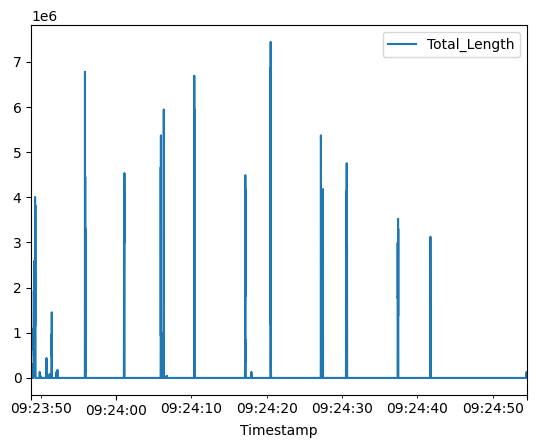

In [11]:
df_mac_2_resampled2.set_index("Timestamp").plot()

In [12]:
string = """72 c0 1b ae a7 9f 20 0b 74 7b c6 39 08 00 45 0005 69 46 36 40 00 80 11 4b 62 0a 16 0b ac 1b 1833 12 c0 5c 01 bb 05 55 cf 40"""

# Remove spaces
string_without_spaces = string.replace(" ", "")

# Get the length of the string without spaces
length_without_spaces = len(string_without_spaces)

print(length_without_spaces)

84


In [13]:
string_without_spaces[32:34]

'05'

In [14]:
def extract_total_length(hex_data):
    # Extract Total Length from the bytes 2 and 3 in the hex string (IPv4 header)
    total_length_hex = hex_data[4:8]  # Slice from position 4 to 8 (because we start counting from 0)
    
    # Convert the extracted hex value to decimal
    total_length = int(total_length_hex, 16)
    return total_length

# Example hex string
hex_data = "72c01bae79f200b747bc6390800450005694636400080114b620a160bac1b183312c05c01bb0555cf40"
total_length = extract_total_length(hex_data)
print("Total Length:", total_length) 

Total Length: 7086


In [16]:
df_mac_2_resampled2

,Timestamp,Total_Length
0,2024-11-06 09:23:48.700,132099
1,2024-11-06 09:23:48.710,0
2,2024-11-06 09:23:48.720,44033
3,2024-11-06 09:23:48.730,0
4,2024-11-06 09:23:48.740,44033
...,...,...
6585,2024-11-06 09:24:54.550,0
6586,2024-11-06 09:24:54.560,0
6587,2024-11-06 09:24:54.570,132099
6588,2024-11-06 09:24:54.580,44033


<Axes: xlabel='Timestamp'>

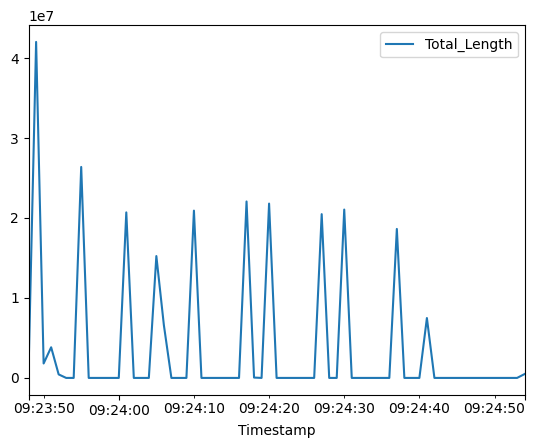

In [18]:
df_mac_1_resampled.set_index("Timestamp").plot()

In [10]:
df_features

,Timestamp,Hex Data,MAC_Destination,MAC_Source,Protocol_Type,IP_Version_Header_Length,Total_Length,TTL,Protocol,Checksum,IP_Source,IP_Destination,UDP_Source_Port,UDP_Destination_Port,UDP_Length,UDP_Checksum,Traffic_Direction
Timestamp,,,,,,,,,,,,,,,,,
2024-11-06 09:23:48.672621,2024-11-06 09:23:48.672621,72c01baea79f200b747bc6390800450005694636400080...,72:c0:1b:ae:a7:9f,20:0b:74:7b:c6:39,0800,45,5,105,70,3640,0.128.17.75,98.10.22.11,44059,6195,12c0,5c01,0.128.17.75 - 98.10.22.11
2024-11-06 09:23:48.702407,2024-11-06 09:23:48.702407,200b747bc63972c01baea79f0800455005690000400036...,20:0b:74:7b:c6:39,72:c0:1b:ae:a7:9f,0800,45,20485,105,0,0040,0.54.17.219,72.27.24.51,4618,5643,ac01,bbc0,0.54.17.219 - 72.27.24.51
2024-11-06 09:23:48.702407,2024-11-06 09:23:48.702407,200b747bc63972c01baea79f0800455002830001400036...,20:0b:74:7b:c6:39,72:c0:1b:ae:a7:9f,0800,45,20482,131,0,0140,0.54.17.222,45.27.24.51,4618,5643,ac01,bbc0,0.54.17.222 - 45.27.24.51
2024-11-06 09:23:48.702407,2024-11-06 09:23:48.702407,200b747bc63972c01baea79f0800455000af0000400036...,20:0b:74:7b:c6:39,72:c0:1b:ae:a7:9f,0800,45,20480,175,0,0040,0.54.17.224,2.27.24.51,4618,5643,ac01,bbc0,0.54.17.224 - 2.27.24.51
2024-11-06 09:23:48.704223,2024-11-06 09:23:48.704223,72c01baea79f200b747bc6390800450000924637400080...,72:c0:1b:ae:a7:9f,20:0b:74:7b:c6:39,0800,45,0,146,70,3740,0.128.17.80,56.10.22.11,44059,6195,12c0,5c01,0.128.17.80 - 56.10.22.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-06 09:24:54.578454,2024-11-06 09:24:54.578454,200b747bc63972c01baea79f0800455002b30001400036...,20:0b:74:7b:c6:39,72:c0:1b:ae:a7:9f,0800,45,20482,179,0,0140,0.54.17.91,147.64.148.144,10,5643,ac01,bbe4,0.54.17.91 - 147.64.148.144
2024-11-06 09:24:54.578706,2024-11-06 09:24:54.578706,72c01baea79f200b747bc6390800450000452d80400080...,72:c0:1b:ae:a7:9f,20:0b:74:7b:c6:39,0800,45,0,69,45,8040,0.128.17.230,209.10.22.11,44096,38032,00e4,c901,0.128.17.230 - 209.10.22.11
2024-11-06 09:24:54.580820,2024-11-06 09:24:54.580820,200b747bc63972c01baea79f08004550012b0000400036...,20:0b:74:7b:c6:39,72:c0:1b:ae:a7:9f,0800,45,20481,43,0,0040,0.54.17.93,28.64.148.144,10,5643,ac01,bbe4,0.54.17.93 - 28.64.148.144


In [11]:
df_mac_1_resampled

,Timestamp,Total_Length
0,2024-11-06 09:23:48,532529
1,2024-11-06 09:23:49,19542652
2,2024-11-06 09:23:50,839851
3,2024-11-06 09:23:51,1782163
4,2024-11-06 09:23:52,204814
...,...,...
62,2024-11-06 09:24:50,0
63,2024-11-06 09:24:51,0
64,2024-11-06 09:24:52,0
65,2024-11-06 09:24:53,0
